<a href="https://www.kaggle.com/code/cheimaaissa/fer-cnn2?scriptVersionId=114722964" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Dataset**

The data consists of 48x48 pixel grayscale images of faces.

The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

Dataset contains two columns, "emotion" and "pixels".

The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image.

The "pixels" column contains a string surrounded in quotes for each image. The contents of this string a space-separated pixel values in row major order. test.csv contains only the "pixels" column and your task is to predict the emotion column.

# Data Visualization

In [1]:
# NumPy for numerical computing
import numpy as np
# Pandas for DataFrames
import pandas as pd
# Matplotlib for visualization
import matplotlib.pyplot as plt
# display plots in the notebook
%matplotlib inline

In [2]:
data = pd.read_csv("/kaggle/input/fer2013/fer2013.csv")
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


# Process Metadata

In [3]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
data = data.rename(columns={"emotion":"label","pixels":"image"})

In [4]:
data['emotion'] = data['label'].apply(lambda x: emotions[int(x)])
data

,label,image,Usage,emotion
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Angry
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Angry
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Fear
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Sad
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Neutral
...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,Neutral
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,Happy
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,Angry
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,Happy


In [5]:
data.drop(columns=['Usage'],inplace=True)

In [6]:
data

,label,image,emotion
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Angry
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Angry
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Fear
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Sad
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Neutral
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,Neutral
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,Happy
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,Angry
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,Happy


## Vislualize Emotions Distribution

<AxesSubplot:xlabel='emotion', ylabel='count'>

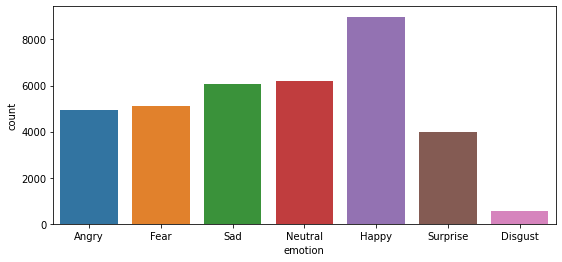

In [7]:
import seaborn as sns
plt.figure(figsize=(9,4))
sns.countplot(x='emotion', data=data)

## oversample

One approach to addressing the problem of class imbalance is to randomly resample the training dataset. The two main approaches to randomly resampling an imbalanced dataset are to delete examples from the majority class, called undersampling, and to duplicate examples from the minority class, called oversampling.

In [8]:
m = data.groupby('label').count().mean().values[0]
oversampled = pd.DataFrame()
for emotion in emotions:
    print('\n' + emotion)
    l = len(data[data.emotion==emotion])
    print('Before sampling: ' + str(l))
    
    if (l>=m):
        df = data[data.emotion==emotion].sample(int(m))
        oversampled = oversampled.append(df)
        print('Ater sampling: ' + str(len(df)))
    else:
        frac = int(m/l)
        df = pd.DataFrame()
        for i in range(frac+1):
            df = df.append(data[data.emotion==emotion])
        df = df[df.emotion==emotion].sample(int(m))
        oversampled = oversampled.append(df)
        print('Ater sampling: ' + str(len(df)))
        
oversampled = oversampled.sample(frac=1).reset_index().drop(columns=['index'])


Angry
Before sampling: 4953
Ater sampling: 5126

Disgust
Before sampling: 547
Ater sampling: 5126

Fear
Before sampling: 5121
Ater sampling: 5126

Happy
Before sampling: 8989
Ater sampling: 5126

Sad
Before sampling: 6077
Ater sampling: 5126

Surprise
Before sampling: 4002
Ater sampling: 5126

Neutral
Before sampling: 6198
Ater sampling: 5126


In [9]:
#save the oversampled dataset
oversampled.to_csv('metadata_processed.csv', index=False)

In [10]:
data = pd.read_csv("/kaggle/working/metadata_processed.csv")

## Vislualize Emotions Distribution after oversampling

<AxesSubplot:xlabel='emotion', ylabel='count'>

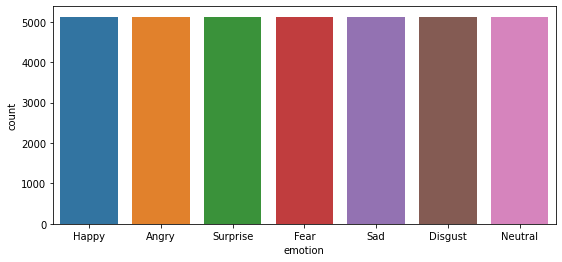

In [11]:
plt.figure(figsize=(9,4))
sns.countplot(x='emotion', data=data)

## Data Preprocessing

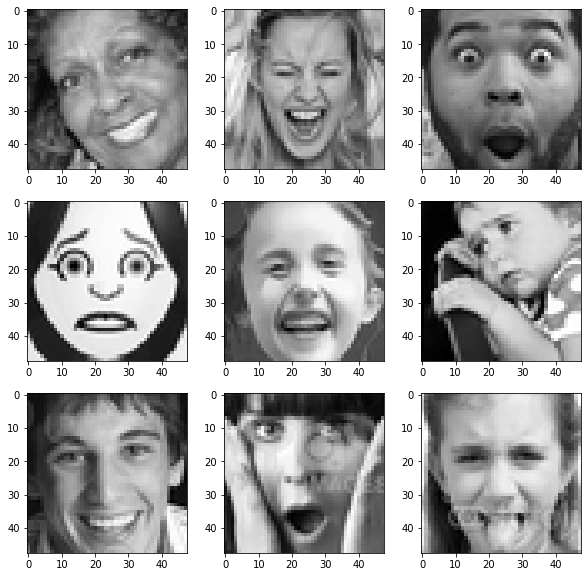

In [12]:
labels = data.iloc[:, 0]
pixels = data.iloc[:, 1]
images = np.zeros((pixels.shape[0], 48*48))
for ix in range(images.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(images.shape[1]):
        images[ix, iy] = int(p[iy])
plt.figure(figsize = (10,10))
for index,image in enumerate(images[:9]):
    plt.subplot(3,3,index+1)
    plt.imshow(image.reshape((48,48)), cmap = 'gray')
plt.show()
train_or_test = data.iloc[:, 2].values

In [13]:
data['emotion'].unique()

array(['Happy', 'Angry', 'Surprise', 'Fear', 'Sad', 'Disgust', 'Neutral'],
      dtype=object)

In [14]:
reshaped_images = np.zeros((images.shape[0], 48, 48,1))
i = 0
for image in images:
  reshaped_images[i] = image.reshape((48,48,1))
  i+=1
reshaped_images.shape

(35882, 48, 48, 1)

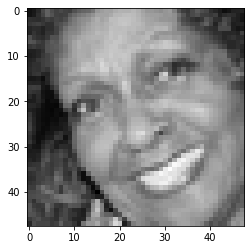

In [15]:
norm_images = reshaped_images / 255.0
plt.imshow(norm_images[0].reshape((48,48)), cmap="gray")
plt.show()

In [16]:
from tensorflow.keras.utils import to_categorical
new_labels = to_categorical(labels, num_classes=7)
new_labels.shape

(35882, 7)

In [17]:
reshaped_images.shape

(35882, 48, 48, 1)

# Splitting the dataset

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(norm_images, new_labels, test_size=0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28705, 48, 48, 1), (7177, 48, 48, 1), (28705, 7), (7177, 7))

# Defining Model

In [19]:
#load the libaray to build the model
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [20]:
#Building up Model Architecture
model = Sequential()
model.add(Conv2D(64, (3,3), padding = "same", input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5,5), padding = "same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding = "same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding = "same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation = "softmax"))

opt = Adam(lr = 0.0005)

model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ['accuracy'])
model.summary()

2022-12-25 20:00:37.961371: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-25 20:00:38.076816: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-25 20:00:38.077620: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-25 20:00:38.078864: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


## Model Training 

In [21]:
epochs = 30

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')

checkpoint = ModelCheckpoint("fer_model.h5", monitor='val_loss', 
                             mode='max', verbose=1)

callbacks = [checkpoint, reduce_lr]

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=callbacks, epochs = epochs)

2022-12-25 20:00:41.448417: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-12-25 20:00:43.548988: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


898/898 [==============================] - 19s 13ms/step - loss: 1.8471 - accuracy: 0.2969 - val_loss: 1.5291 - val_accuracy: 0.4176

Epoch 00001: saving model to fer_model.h5
Epoch 2/30
898/898 [==============================] - 11s 13ms/step - loss: 1.4303 - accuracy: 0.4545 - val_loss: 1.2426 - val_accuracy: 0.5229

Epoch 00002: saving model to fer_model.h5
Epoch 3/30
898/898 [==============================] - 11s 13ms/step - loss: 1.2493 - accuracy: 0.5307 - val_loss: 1.1157 - val_accuracy: 0.5741

Epoch 00003: saving model to fer_model.h5
Epoch 4/30
898/898 [==============================] - 11s 13ms/step - loss: 1.1240 - accuracy: 0.5757 - val_loss: 1.0761 - val_accuracy: 0.5870

Epoch 00004: saving model to fer_model.h5
Epoch 5/30
898/898 [==============================] - 11s 12ms/step - loss: 1.0483 - accuracy: 0.6018 - val_loss: 0.9664 - val_accuracy: 0.6407

Epoch 00005: saving model to fer_model.h5
Epoch 6/30
898/898 [==============================] - 11s 12ms/step - loss: 

# Testing the model on some images

In [22]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Sad", 5: "Surprised", 6: "Neutral"}

  #emojis unicodes #
emojis = { 0:"\U0001f620",1:"\U0001f922" ,2:"\U0001f628" ,3:"\U0001f60A" , 4:"\U0001f625" ,5:"\U0001f632",6:"\U0001f610" }
print(emojis.values(),sep=" ")

dict_values(['😠', '🤢', '😨', '😊', '😥', '😲', '😐'])


In [23]:
import cv2
from PIL import Image
from matplotlib import pyplot as plt 
def _predict(path):
  facecasc = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
  imagePath = path
  image = cv2.imread(imagePath)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=10)
  print("No of faces : ",len(faces))
  i = 1
  for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]                      #croping
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    prediction = model.predict(cropped_img)
    maxindex = int(np.argmax(prediction))
    print("person ",i," : ",emotion_dict[maxindex], "-->",emojis[maxindex])
    cv2.putText(image, emotion_dict[maxindex], (x+10, y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)  
                                              #if text is not apeared , change coordinates. it may work
    plt.imshow(image)
    plt.show()

No of faces :  1
person  1  :  Happy --> 😊


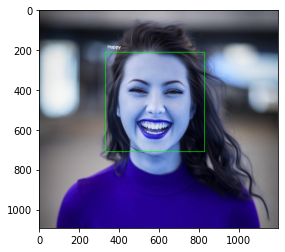

In [24]:
_predict("/kaggle/input/images/Photo-happy-1-unsplash-michael-dam.jpg")

No of faces :  1
person  1  :  Sad --> 😥


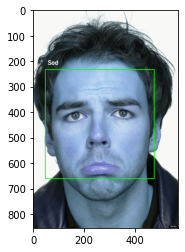

In [25]:
_predict("/kaggle/input/images/sad22.jpg")

No of faces :  1
person  1  :  Sad --> 😥


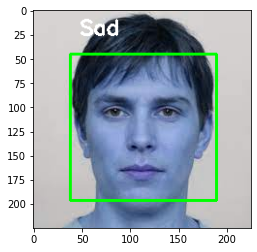

In [26]:
_predict("/kaggle/input/images/neutre.jpg")

No of faces :  1
person  1  :  Sad --> 😥


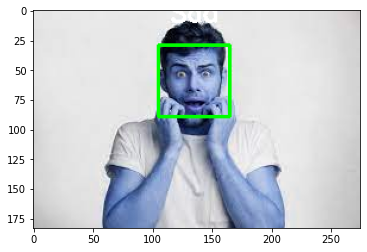

In [27]:
_predict("/kaggle/input/images/fear.jpg")

No of faces :  1
person  1  :  Surprised --> 😲


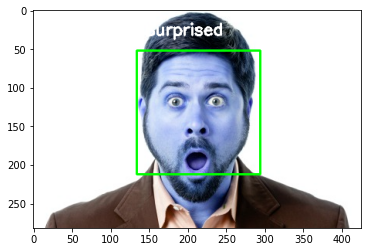

In [28]:
_predict("/kaggle/input/images/surprise.jpg")

No of faces :  1
person  1  :  Angry --> 😠


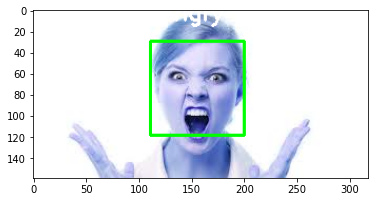

In [29]:
_predict("/kaggle/input/images/angry2.jpg")